## [CRIME ANALYSIS](https://www.kaggle.com/chetauwadinma) <br> By Cheta Uwadinma


In [1]:
#import Libaries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load dataset
df = pd.read_csv( r"C:\Users\HomePC\Downloads\archive (3)\crime_data.csv")
df

,Disposition,OffenderStatus,Offender_Race,Offender_Gender,Offender_Age,PersonType,Victim_Race,Victim_Gender,Victim_Age,Victim_Fatal_Status,Report Type,Category
0,CLOSED,ARRESTED,BLACK,MALE,30.0,VICTIM,BLACK,FEMALE,29.0,Non-fatal,Supplemental Report,Theft
1,CLOSED,ARRESTED,BLACK,MALE,30.0,VICTIM,BLACK,FEMALE,29.0,Non-fatal,Supplemental Report,Theft
2,CLOSED,ARRESTED,BLACK,MALE,30.0,VICTIM,BLACK,FEMALE,29.0,Non-fatal,Supplemental Report,Theft
3,CLOSED,ARRESTED,BLACK,MALE,30.0,VICTIM,BLACK,FEMALE,29.0,Non-fatal,Supplemental Report,Theft
4,CLOSED,ARRESTED,BLACK,MALE,30.0,VICTIM,BLACK,FEMALE,29.0,Non-fatal,Supplemental Report,Theft
...,...,...,...,...,...,...,...,...,...,...,...,...
6633,CLOSED,ARRESTED,BLACK,FEMALE,30.0,VICTIM,WHITE,MALE,34.0,Non-fatal,Supplemental Report,Theft
6634,CLOSED,ARRESTED,WHITE,FEMALE,20.0,VICTIM,WHITE,MALE,34.0,Non-fatal,Supplemental Report,Theft
6635,CLOSED,ARRESTED,BLACK,FEMALE,26.0,VICTIM,BLACK,FEMALE,34.0,Non-fatal,Supplemental Report,Violence
6636,CLOSED,ARRESTED,WHITE,MALE,38.0,VICTIM,UNKNOWN,MALE,31.0,Non-fatal,Supplemental Report,Violence


In [5]:
df.isnull().sum()

Disposition            0
OffenderStatus         0
Offender_Race          0
Offender_Gender        0
Offender_Age           0
PersonType             0
Victim_Race            0
Victim_Gender          0
Victim_Age             0
Victim_Fatal_Status    0
Report Type            0
Category               0
dtype: int64

In [7]:
df.describe()

,Offender_Age,Victim_Age
count,6638.000000,6638.000000
mean,34.634378,38.590539
std,12.797407,15.297202
min,11.000000,0.000000
25%,25.000000,27.000000
50%,33.000000,36.000000
75%,42.000000,48.000000
max,83.000000,124.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6638 entries, 0 to 6637
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Disposition          6638 non-null   object 
 1   OffenderStatus       6638 non-null   object 
 2   Offender_Race        6638 non-null   object 
 3   Offender_Gender      6638 non-null   object 
 4   Offender_Age         6638 non-null   float64
 5   PersonType           6638 non-null   object 
 6   Victim_Race          6638 non-null   object 
 7   Victim_Gender        6638 non-null   object 
 8   Victim_Age           6638 non-null   float64
 9   Victim_Fatal_Status  6638 non-null   object 
 10  Report Type          6638 non-null   object 
 11  Category             6638 non-null   object 
dtypes: float64(2), object(10)
memory usage: 622.4+ KB


In [10]:
df.shape

(6638, 12)

# --- DATA ANALYSIS AND VISUALIZATION ---

Chart 1: Crime Category Distribution saved.


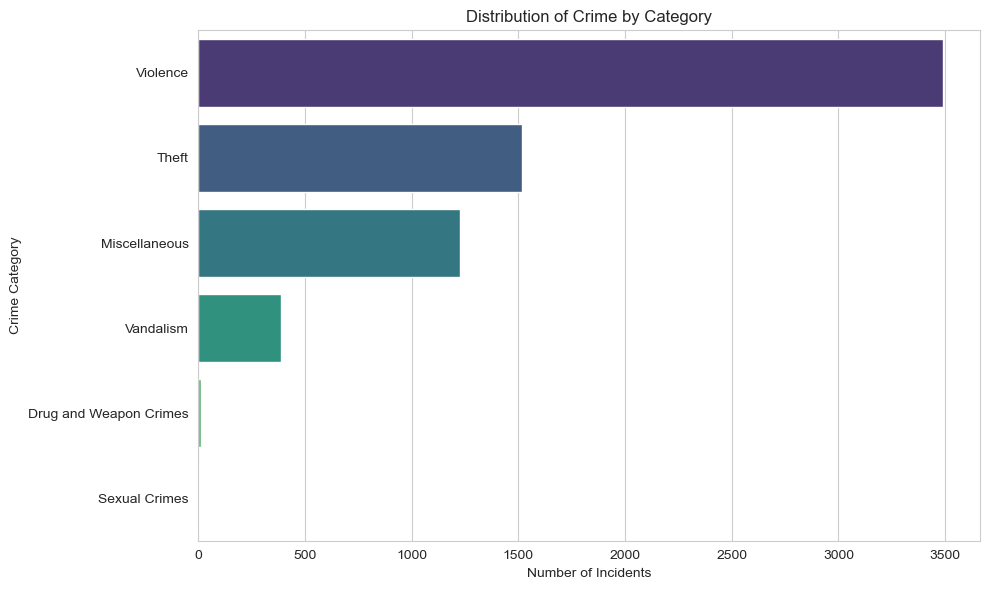

In [22]:


# Set a style for all our plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) # Set default figure size

# Analysis 1: What are the most common crime categories?
plt.figure()
crime_category_counts = df['Category'].value_counts()
sns.barplot(x=crime_category_counts.values, y=crime_category_counts.index, palette='viridis')
plt.title('Distribution of Crime by Category')
plt.xlabel('Number of Incidents')
plt.ylabel('Crime Category')
plt.tight_layout() 
plt.savefig('output/1_crime_category_distribution.png')
print("Chart 1: Crime Category Distribution saved.")

Chart 2: Age Distribution saved.


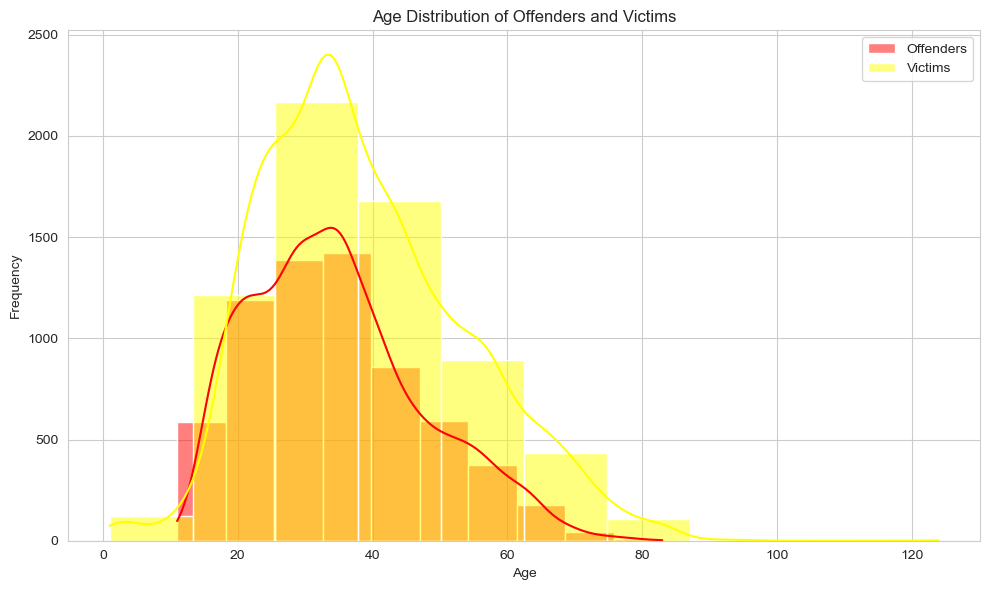

In [21]:

plt.figure()
sns.histplot(df[df['Offender_Age'] > 0]['Offender_Age'], bins=10, kde=True, color='red', label='Offenders')
sns.histplot(df[df['Victim_Age'] > 0]['Victim_Age'], bins=10, kde=True, color='yellow', label='Victims')
plt.title('Age Distribution of Offenders and Victims')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.savefig('output/2_age_distribution.png')
print("Chart 2: Age Distribution saved.")

Chart 3: Gender Breakdown saved.


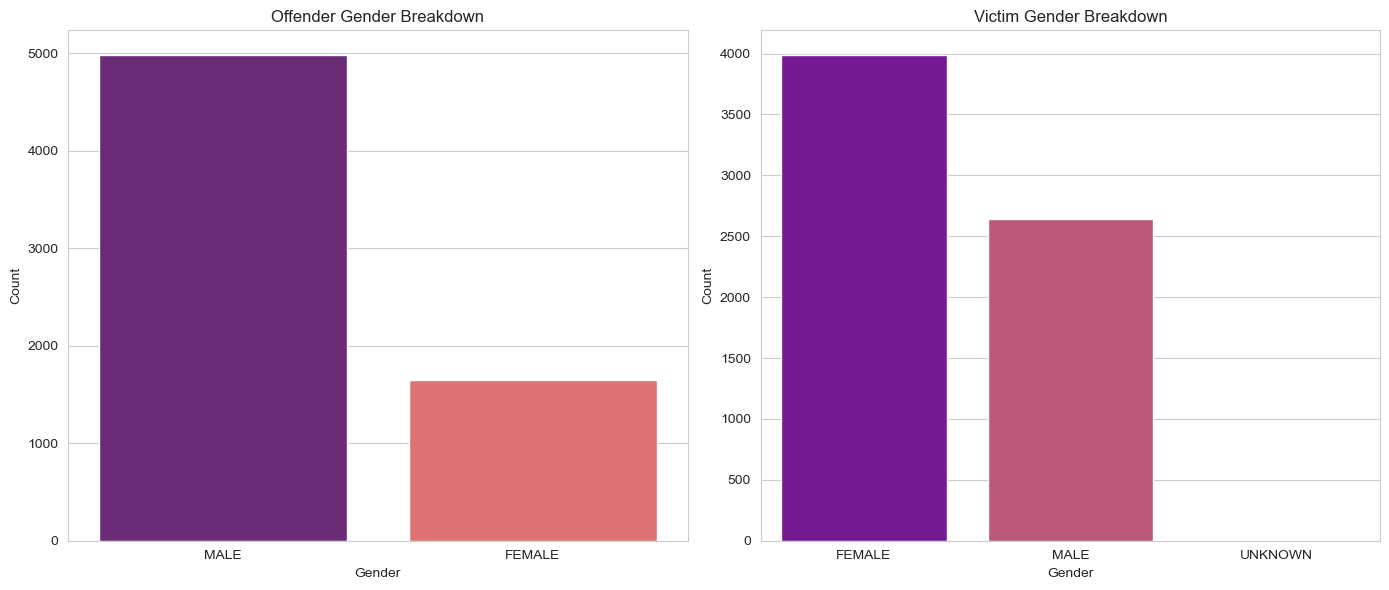

In [20]:
# Analysis 3: What is the gender breakdown for offenders and victims?
fig, axes = plt.subplots(1, 2, figsize=(14, 6)) # 1 row, 2 columns of plots
sns.countplot(x='Offender_Gender', data=df, ax=axes[0], palette='magma', order=df['Offender_Gender'].value_counts().index)
axes[0].set_title('Offender Gender Breakdown')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

sns.countplot(x='Victim_Gender', data=df, ax=axes[1], palette='plasma', order=df['Victim_Gender'].value_counts().index)
axes[1].set_title('Victim Gender Breakdown')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Count')
plt.savefig('output/3_gender_breakdown.png')
plt.tight_layout()
print("Chart 3: Gender Breakdown saved.")

Chart 5: Heatmap of Offender Race vs Category saved.


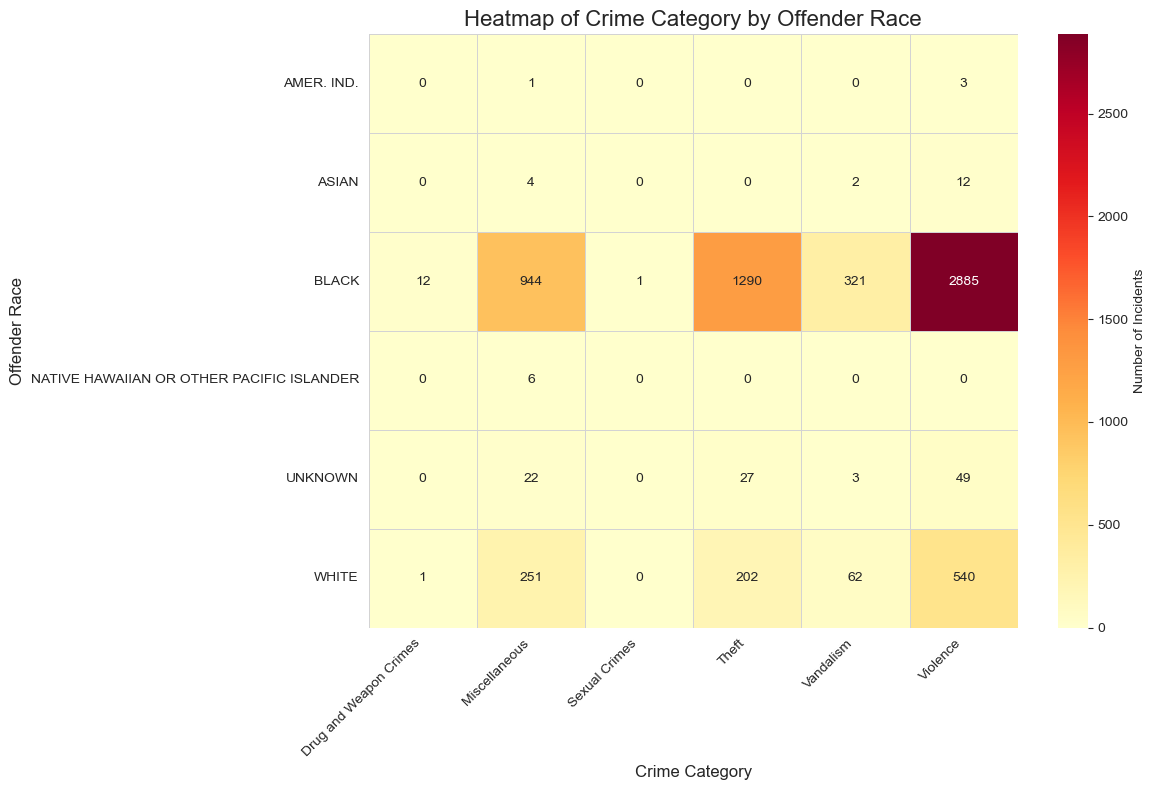

In [33]:
# Analysis 5: Is there a relationship between offender race and crime category?
plt.figure(figsize=(12, 8))
# Use a crosstab to get counts of each combination
offender_race_crime = pd.crosstab(df['Offender_Race'], df['Category'])
sns.heatmap(offender_race_crime, annot=True, fmt='d', cmap='YlOrRd', linewidths=.5, linecolor='lightgrey', cbar_kws={'label':'Number of Incidents'}) # 'annot=True' writes the data value in each cell
plt.title('Heatmap of Crime Category by Offender Race', fontsize=16)
plt.xlabel('Crime Category', fontsize=12)
plt.ylabel('Offender Race', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('output/5_heatmap_offender_race_vs_category.png')
print("Chart 5: Heatmap of Offender Race vs Category saved.")

Chart 6: Age Relationship Hexbin Plot saved.


Analysis complete! All charts have been saved to the 'output' folder.


<Figure size 1000x600 with 0 Axes>

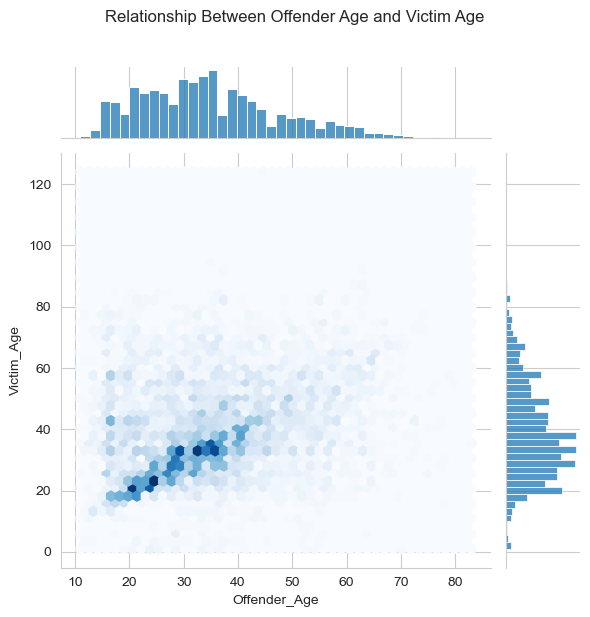

In [ ]:
# Analysis 6: Let's explore the relationship between offender age and victim age.
# A scatter plot is great for this, but with over 6000 points, it can be messy.
# Let's use a hexbin plot which is better for dense data.
plt.figure()
# We filter out ages <= 0 as they might be unknown/data entry errors
df_age_filtered = df[(df['Offender_Age'] > 0) & (df['Victim_Age'] > 0)]
sns.jointplot(data=df_age_filtered, x='Offender_Age', y='Victim_Age', kind='hex', cmap='Blues')
plt.suptitle('Relationship Between Offender Age and Victim Age', y=1.02)
plt.tight_layout()
plt.savefig('output/6_age_relationship_hexbin.png')
print("Chart 6: Age Relationship Hexbin Plot saved.")


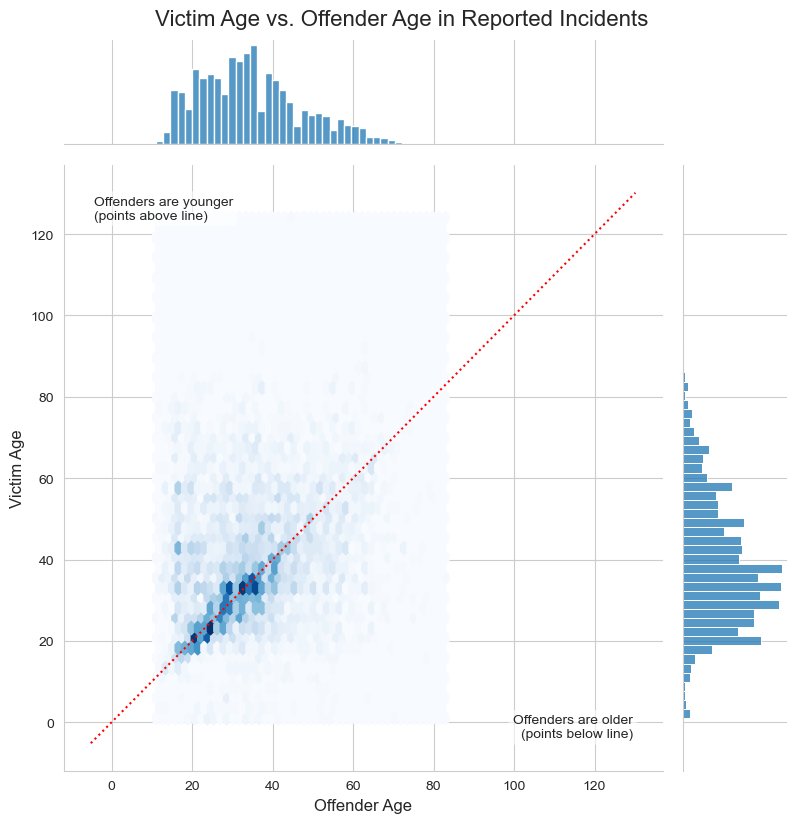

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Assume df_age_filtered is your DataFrame ---

# Create the jointplot object
g = sns.jointplot(
    data=df_age_filtered, 
    x='Offender_Age', 
    y='Victim_Age', 
    kind='hex', 
    cmap='Blues',
    height=8
)

# Set a more insightful title
g.fig.suptitle('Victim Age vs. Offender Age in Reported Incidents', y=1.02, fontsize=16)
g.set_axis_labels('Offender Age', 'Victim Age', fontsize=12)


# --- THIS IS THE KEY ADDITION ---
# Add a 45-degree reference line (where Offender Age = Victim Age)
# This makes it easy to see age disparities at a glance.

# Get the current axes limits to draw the line across the whole plot
lims = [
    np.min([g.ax_joint.get_xlim(), g.ax_joint.get_ylim()]),  # min of both axes
    np.max([g.ax_joint.get_xlim(), g.ax_joint.get_ylim()]),  # max of both axes
]

# Plot a red dashed line
g.ax_joint.plot(lims, lims, ':r', zorder=2)
# ':r' means dotted red line. zorder=2 ensures it's drawn on top of the hexes.


# --- Add an Annotation to Explain the Line ---
# This tells the viewer exactly what the line means.
g.ax_joint.text(
    0.05, 0.95,  # Position in the top-left corner of the plot
    'Offenders are younger\n(points above line)', 
    transform=g.ax_joint.transAxes, 
    ha='left', va='top', fontsize=10, 
    bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.6, ec='none')
)
g.ax_joint.text(
    0.95, 0.05, # Position in the bottom-right corner
    'Offenders are older\n(points below line)', 
    transform=g.ax_joint.transAxes, 
    ha='right', va='bottom', fontsize=10,
    bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.6, ec='none')
)

plt.show()

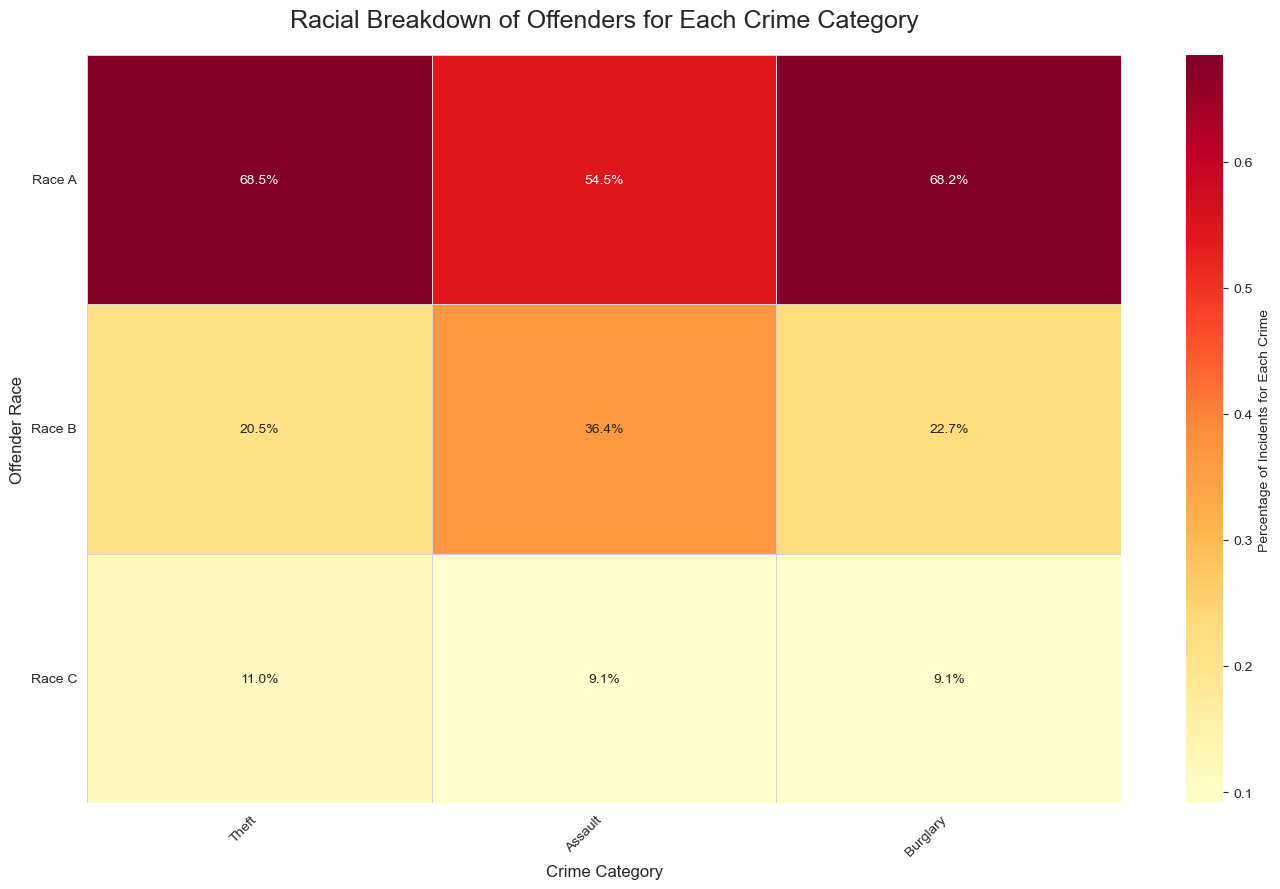

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Let's assume offender_race_crime is a Pandas DataFrame
# Example data for a runnable script:
data = {'Theft': [500, 150, 80], 'Assault': [300, 200, 50], 'Burglary': [150, 50, 20]}
index_labels = ['Race A', 'Race B', 'Race C']
offender_race_crime = pd.DataFrame(data, index=index_labels)


# --- START OF EXCEPTIONAL CODE ---

# 1. NORMALIZE THE DATA to answer a more interesting question.
# We will normalize by column (crime type) to see the percentage breakdown for each crime.
# The result will show, "For all thefts, X% were by Race A, Y% by Race B, etc."
normalized_df = offender_race_crime.div(offender_race_crime.sum(axis=0), axis=1)

# 2. PLOT THE NORMALIZED DATA
plt.figure(figsize=(14, 9))

# Note the changes in `annot` and `fmt`!
heatmap = sns.heatmap(
    normalized_df, 
    annot=True, 
    # Use '.1%' to format the numbers as percentages (e.g., 0.55 -> 55.0%)
    fmt='.1%', 
    cmap='YlOrRd',
    linewidths=.5,
    linecolor='lightgray',
    cbar_kws={'label': 'Percentage of Incidents for Each Crime'}
)

# 3. USE A MORE INSIGHTFUL TITLE
plt.title('Racial Breakdown of Offenders for Each Crime Category', fontsize=18, pad=20)

# 4. CLEAR AXIS LABELS
plt.xlabel('Crime Category', fontsize=12)
plt.ylabel('Offender Race', fontsize=12)

# 5. ROTATE LABELS for readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# 6. ENSURE LAYOUT IS CLEAN
plt.tight_layout()

# 7. SAVE THE FIGURE for your portfolio/report
plt.savefig('output/crime_heatmap_normalized.png', dpi=300)

plt.show()